In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from scipy import signal

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)


In [87]:
train = pd.read_json("../data/train.json")
train["inc_angle"] = pd.to_numeric(train["inc_angle"], errors="coerce")

In [88]:
train.tail()

,band_1,band_2,id,inc_angle,is_iceberg
1599,"[-30.999878, -29.976866, -28.233906, -29.50732...","[-27.847719, -28.233864, -24.712078, -24.45282...",04e11240,NaN,0
1600,"[-25.31155, -26.511555, -28.694487, -27.180115...","[-29.563713, -28.290375, -26.839405, -28.29046...",c7d6f6f8,NaN,0
1601,"[-18.141895, -18.141844, -19.01737, -19.701599...","[-25.305355, -29.387701, -28.963863, -26.16023...",bba1a0f1,NaN,0
1602,"[-22.455633, -25.794661, -26.954567, -22.83354...","[-26.070356, -22.093737, -21.577662, -24.53376...",7f66bb44,NaN,0
1603,"[-19.909191, -20.678406, -20.208834, -18.42441...","[-24.44487, -24.956001, -27.722103, -26.078417...",9d8f326c,NaN,0


In [104]:
def process_train_data(data):
    #Create 3 bands having HH, HV and avg of both
    X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in data["band_1"]])
    X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in data["band_2"]])
    X_band_avg = (X_band_1+X_band_2)/2

    print X_band_avg.shape

    # standardize data
    _mean = X_band_avg.mean()
    _std = X_band_avg.std()
    standardized = (X_band_avg - _mean) / (_std * 1.0)

    scaler = StandardScaler()
    tshape = X_band_1.shape

    scaled = scaler.fit_transform(X_band_avg.reshape(1, -1))
    scaled = scaled.reshape(tshape)

    print("scaled shape:", scaled.shape, 75*75)

    print(np.median(standardized))
    print(standardized.mean())


    print
    print(np.median(scaled))
    print(scaled.mean())

    layer_list = [X_band_1[..., np.newaxis],      # 0
                  X_band_2[..., np.newaxis],      # 1
                  X_band_avg[..., np.newaxis],    # 2
                 standardized[..., np.newaxis],   # 3
                 scaled[..., np.newaxis]]         # 4

    processed = np.concatenate(layer_list, axis=-1)
    
    return processed

In [124]:
icebergs = train[train.is_iceberg==1].sample(n=9, random_state=987)
ships = train[train.is_iceberg==0].sample(n=9, random_state=457)

print(icebergs.shape)

#Generate the training data

icebergs = process_train_data(icebergs)


print(icebergs.shape)


X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in ships["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in ships["band_2"]])
X_band_avg = (X_band_1+X_band_2)/2

scaler2 = StandardScaler()
tshape = X_band_1.shape

scaled = scaler2.fit_transform(X_band_avg.reshape(1, -1))
scaled = scaled.reshape(tshape)

layer_list = [X_band_1[..., np.newaxis], 
              X_band_2[..., np.newaxis],
              X_band_avg[..., np.newaxis],
             scaled[..., np.newaxis]]

ships = np.concatenate(layer_list, axis=-1)


(9, 5)
(9, 75, 75)
('scaled shape:', (9, 75, 75), 5625)
-0.0598777
2.82419e-07

0.0
0.0
(9, 75, 75, 5)


In [90]:
def plotmy3d(c, name):

    data = [
        go.Surface(
            z=c
        )
    ]
    layout = go.Layout(
        title=name,
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)


(array([  2.84890000e+04,   1.69600000e+03,   1.62000000e+03,
          1.44300000e+03,   1.45000000e+03,   1.31600000e+03,
          1.24900000e+03,   1.23400000e+03,   1.10100000e+03,
          1.01000000e+03,   9.85000000e+02,   8.22000000e+02,
          7.83000000e+02,   7.29000000e+02,   6.80000000e+02,
          5.99000000e+02,   5.30000000e+02,   4.98000000e+02,
          4.45000000e+02,   4.42000000e+02,   3.75000000e+02,
          3.11000000e+02,   2.55000000e+02,   2.28000000e+02,
          2.01000000e+02,   1.70000000e+02,   1.54000000e+02,
          1.34000000e+02,   9.80000000e+01,   1.02000000e+02,
          7.90000000e+01,   7.90000000e+01,   7.40000000e+01,
          6.60000000e+01,   5.70000000e+01,   4.50000000e+01,
          6.60000000e+01,   4.90000000e+01,   3.90000000e+01,
          4.90000000e+01,   4.00000000e+01,   3.20000000e+01,
          3.30000000e+01,   4.90000000e+01,   4.20000000e+01,
          4.90000000e+01,   2.90000000e+01,   3.40000000e+01,
        

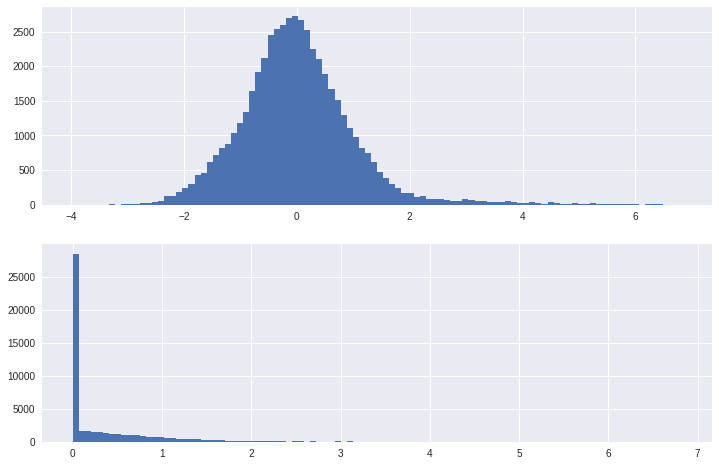

In [91]:
fig, ag = plt.subplots(2, 1, figsize=(12, 8))

ag[0].hist(icebergs[..., 4].flatten(), bins=100)
ag[1].hist(np.clip(icebergs[..., 4].flatten(), 0, 7), bins=100)

In [129]:
# plotmy3d(icebergs[4,:,:,4], 'iceberg')
plotmy3d(icebergs[2, ..., 2], 'Iceberg')

In [131]:
plotmy3d(ships[3,:,:,1], 'ship')